In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_train.shape

(614, 13)

In [6]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())

In [9]:
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].median())

In [10]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df_train.dropna(inplace=True)

In [12]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df_train.shape

(542, 13)

In [14]:
print(pd.crosstab(df_train['Gender'],df_train['Loan_Status']))

Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


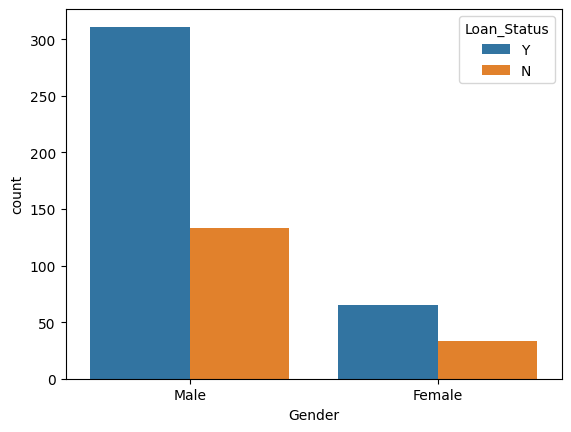

In [15]:
sns.countplot(data=df_train, x='Gender', hue='Loan_Status')
plt.show()

Loan_Status   N    Y
Married             
No           70  117
Yes          96  259


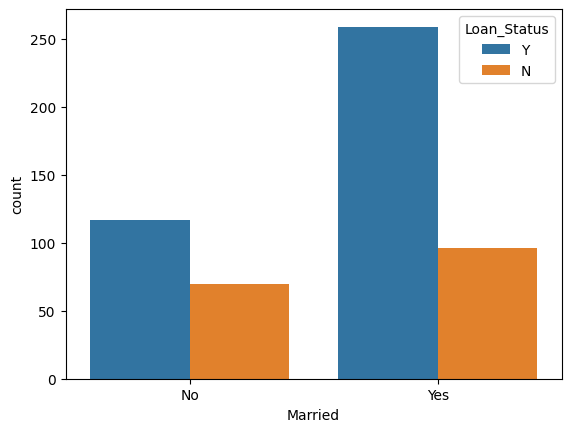

In [16]:
print(pd.crosstab(df_train['Married'],df_train['Loan_Status']))
sns.countplot(data=df_train, x='Married', hue='Loan_Status')
plt.show()

Loan_Status      N    Y
Self_Employed          
No             141  326
Yes             25   50


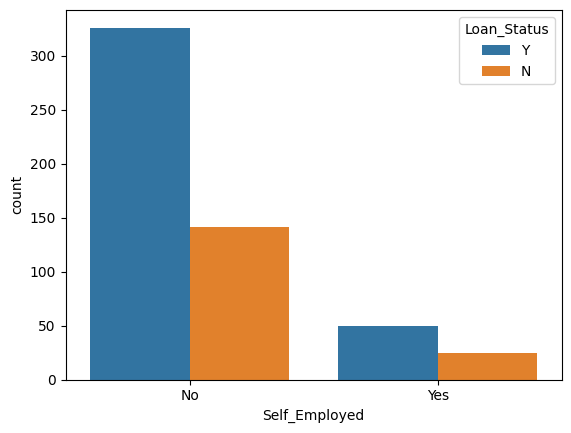

In [17]:
print(pd.crosstab(df_train['Self_Employed'],df_train['Loan_Status']))
sns.countplot(data=df_train, x='Self_Employed', hue='Loan_Status')
plt.show()

Loan_Status     N    Y
Property_Area         
Rural          61   98
Semiurban      47  162
Urban          58  116


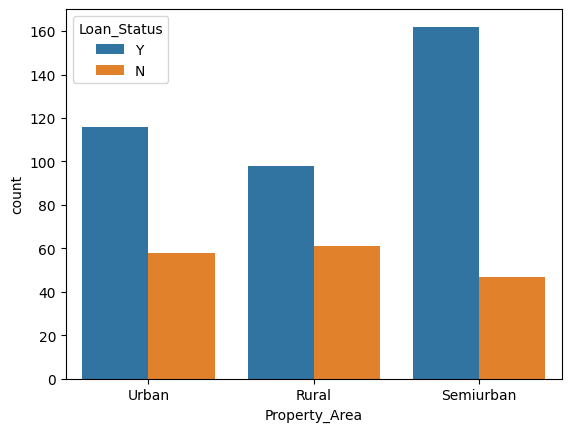

In [18]:
print(pd.crosstab(df_train['Property_Area'],df_train['Loan_Status']))
sns.countplot(data=df_train, x='Property_Area', hue='Loan_Status')
plt.show()

<Axes: xlabel='count', ylabel='Loan_Amount_Term'>

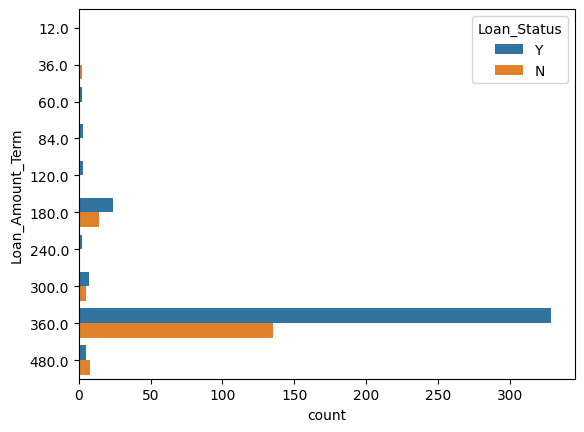

In [19]:
sns.countplot(y='Loan_Amount_Term',hue='Loan_Status',data=df_train)

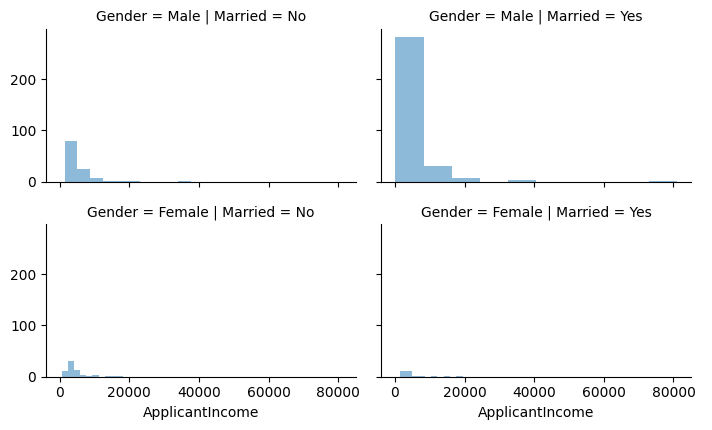

In [20]:
grid = sns.FacetGrid(df_train, row='Gender', col='Married', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

plt.show()

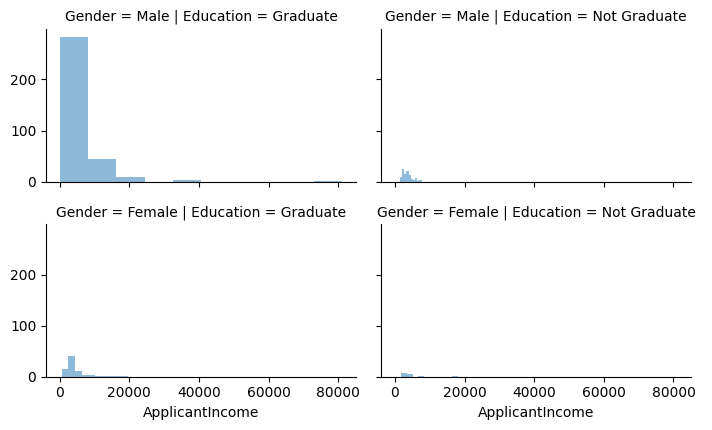

In [21]:
grid = sns.FacetGrid(df_train, row='Gender', col='Education', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

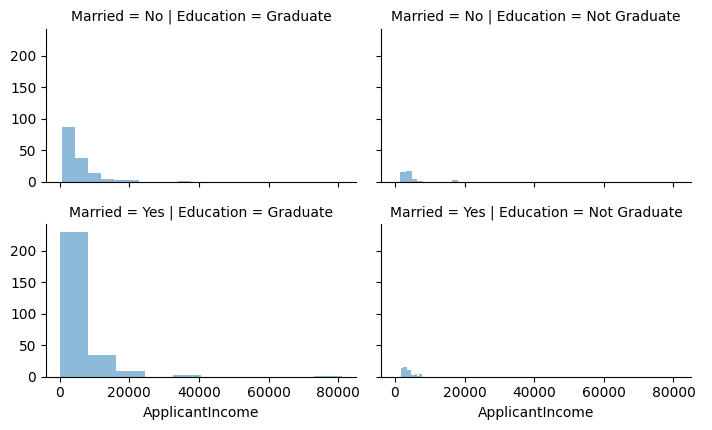

In [22]:
grid = sns.FacetGrid(df_train, row='Married', col='Education', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

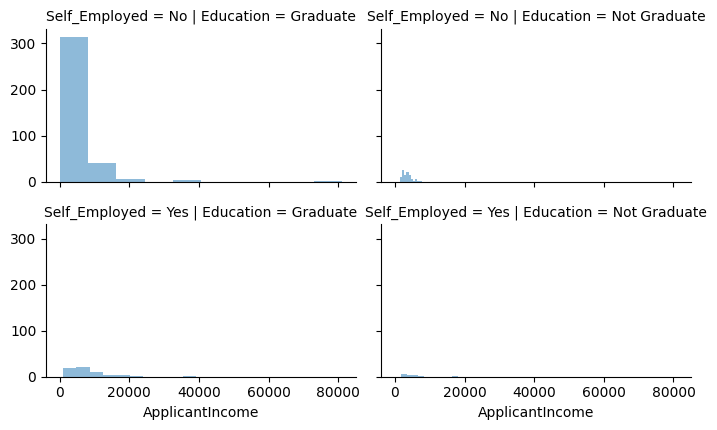

In [23]:
grid = sns.FacetGrid(df_train, row='Self_Employed', col='Education', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

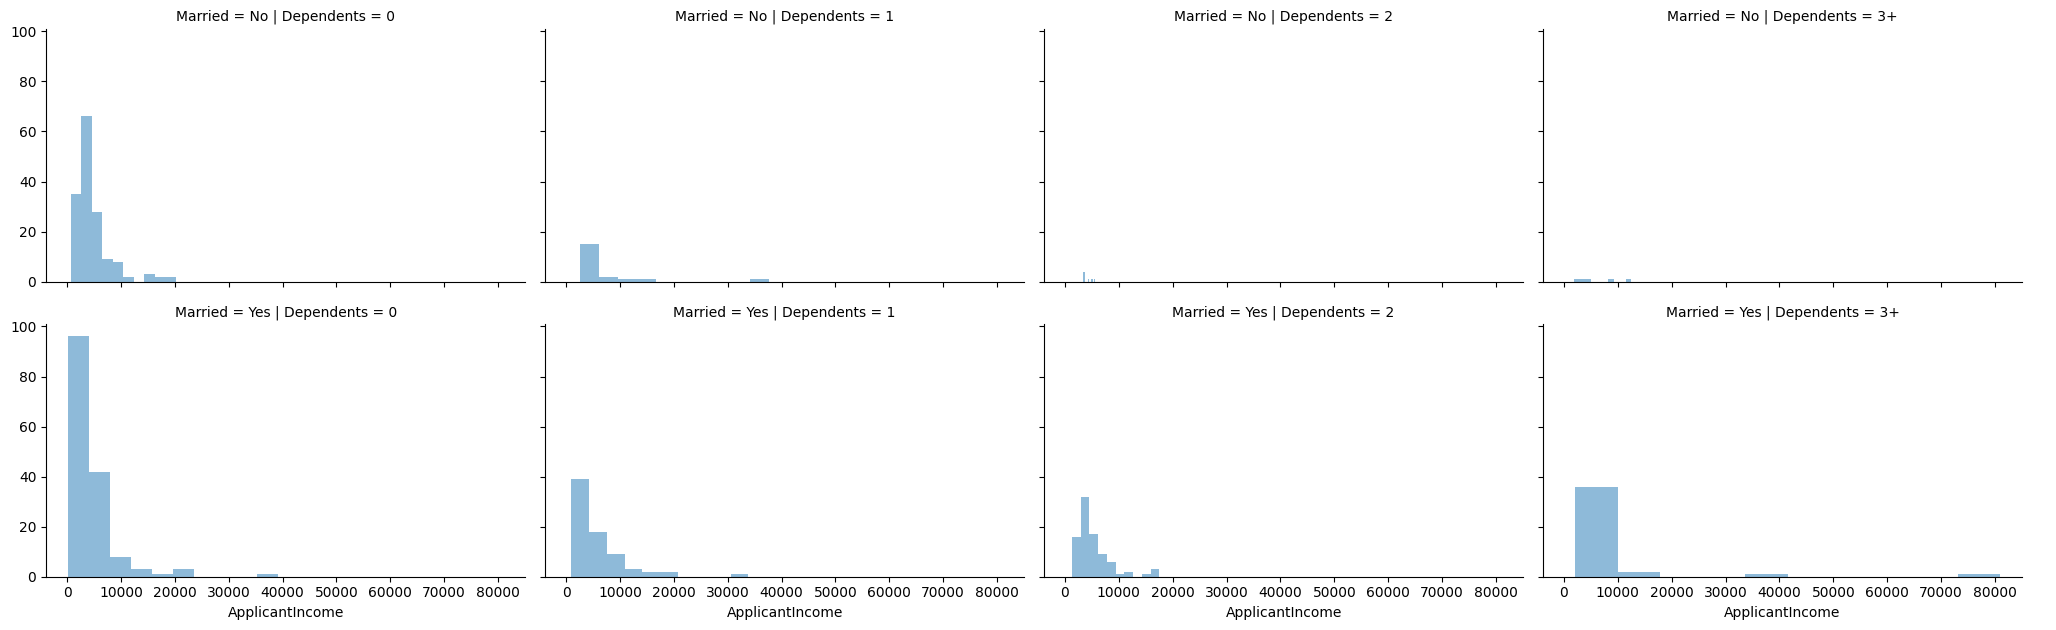

In [24]:
grid = sns.FacetGrid(df_train, row='Married', col='Dependents', height=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

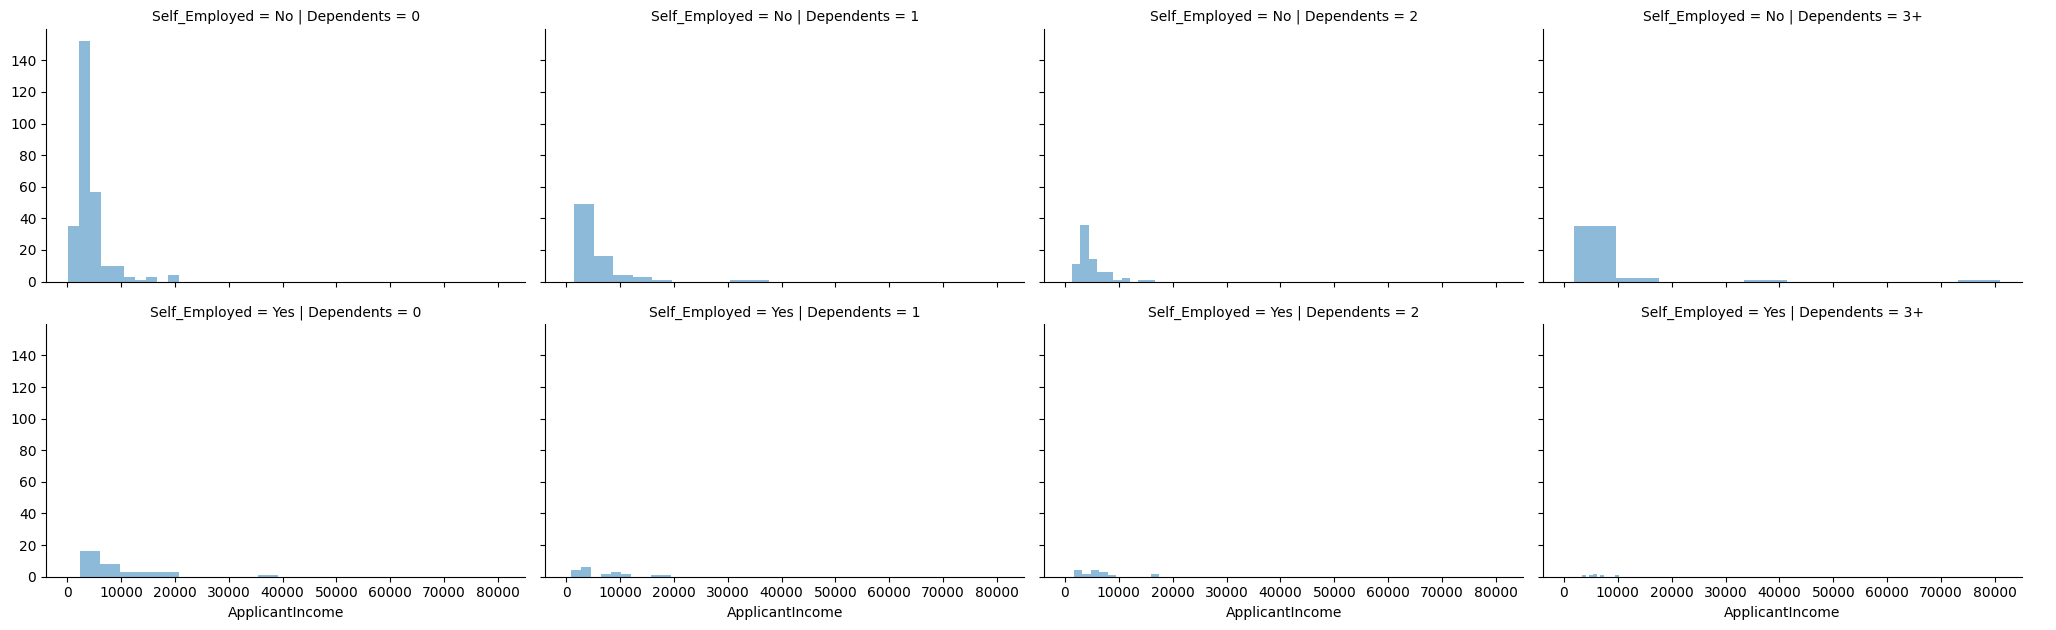

In [25]:
grid = sns.FacetGrid(df_train, row='Self_Employed', col='Dependents', height=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

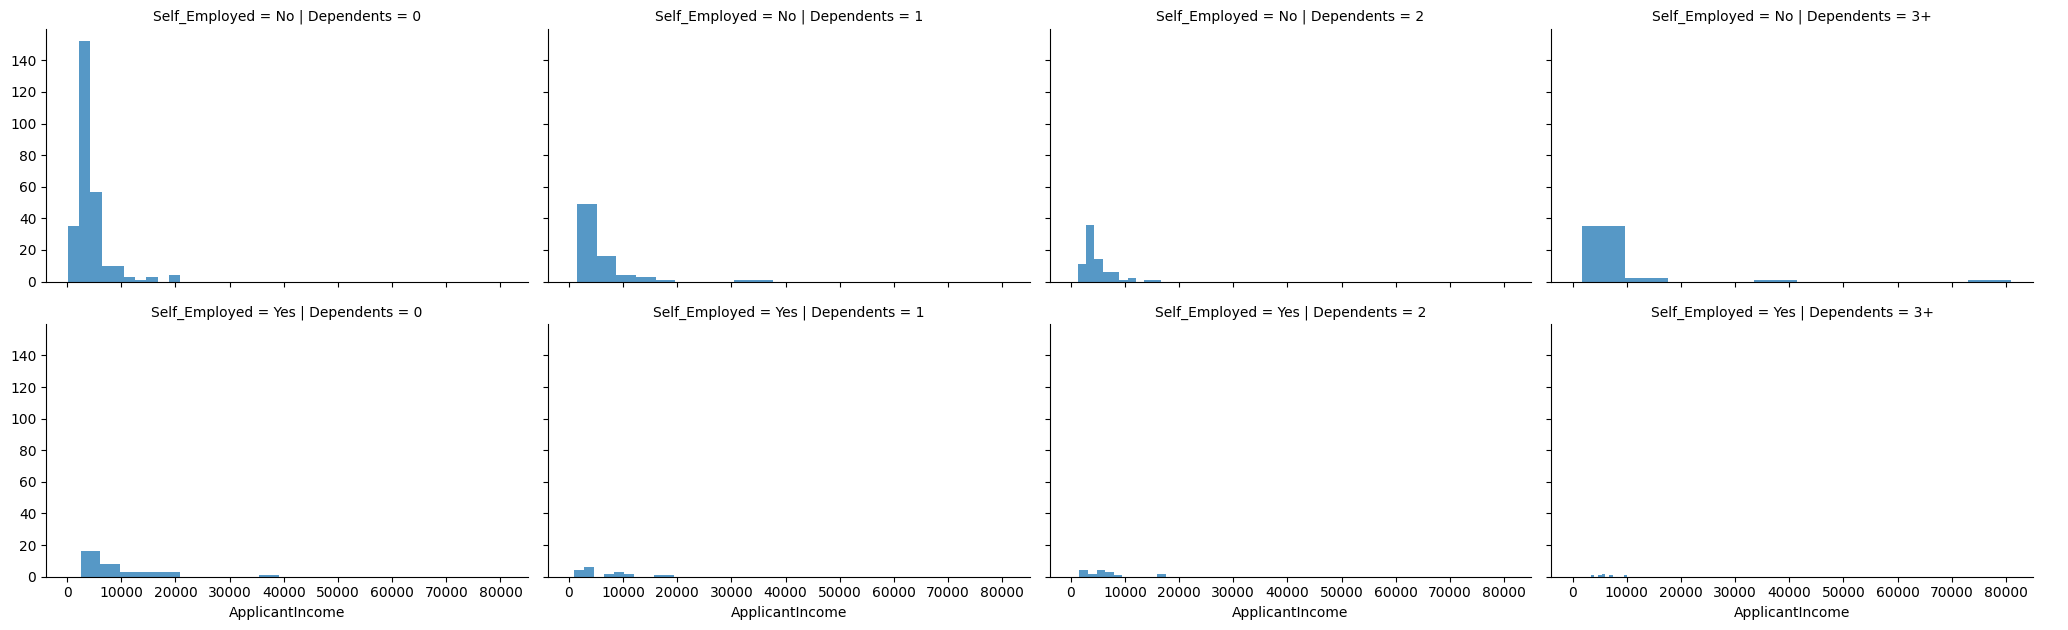

In [26]:
rid = sns.FacetGrid(df_train, row='Gender', col='Dependents', height=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

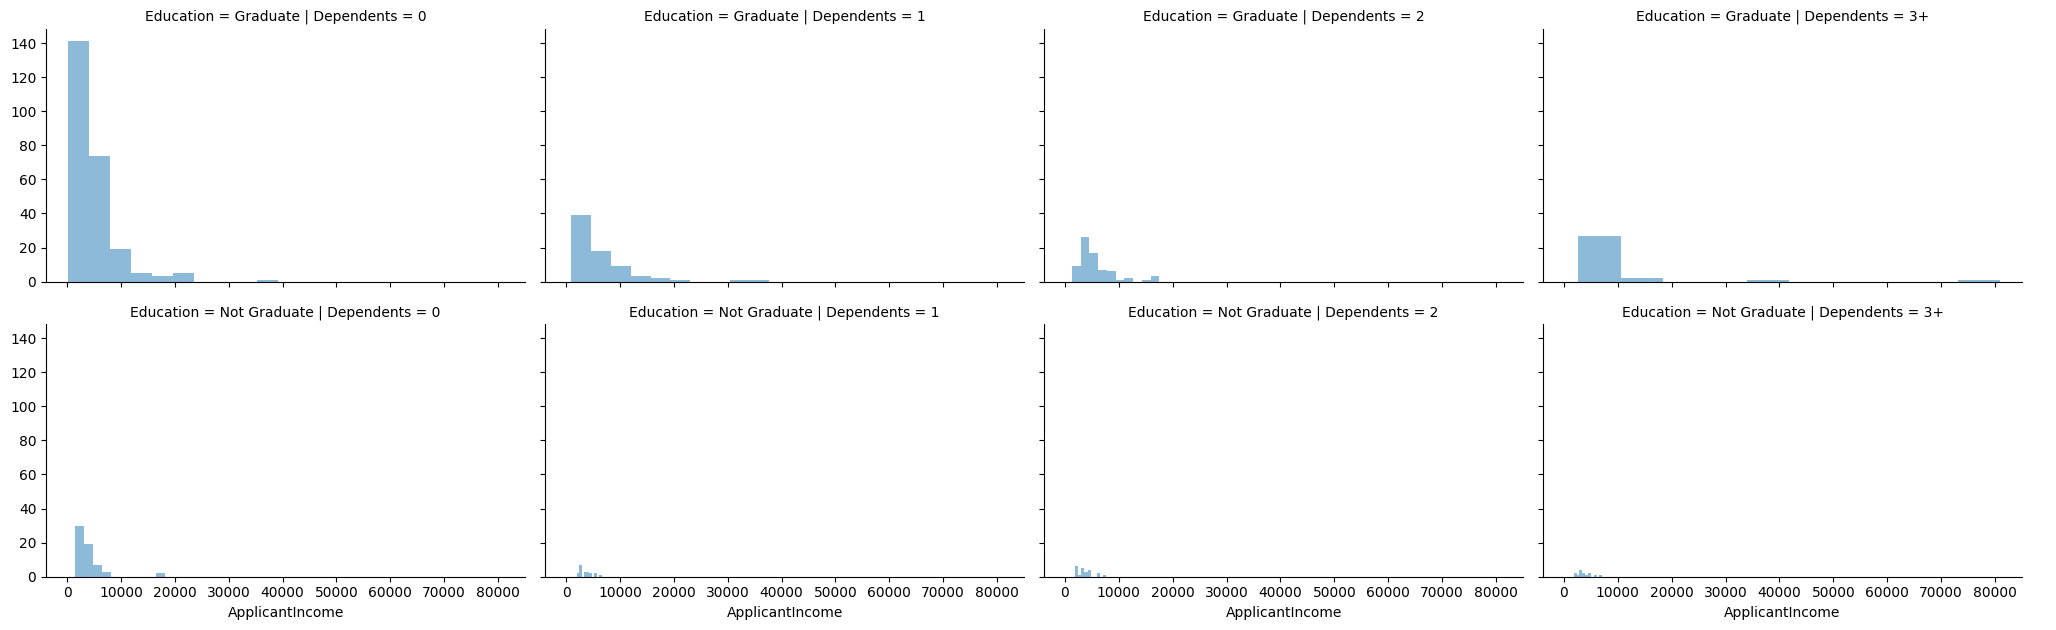

In [27]:
grid = sns.FacetGrid(df_train, row='Education', col='Dependents', height=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

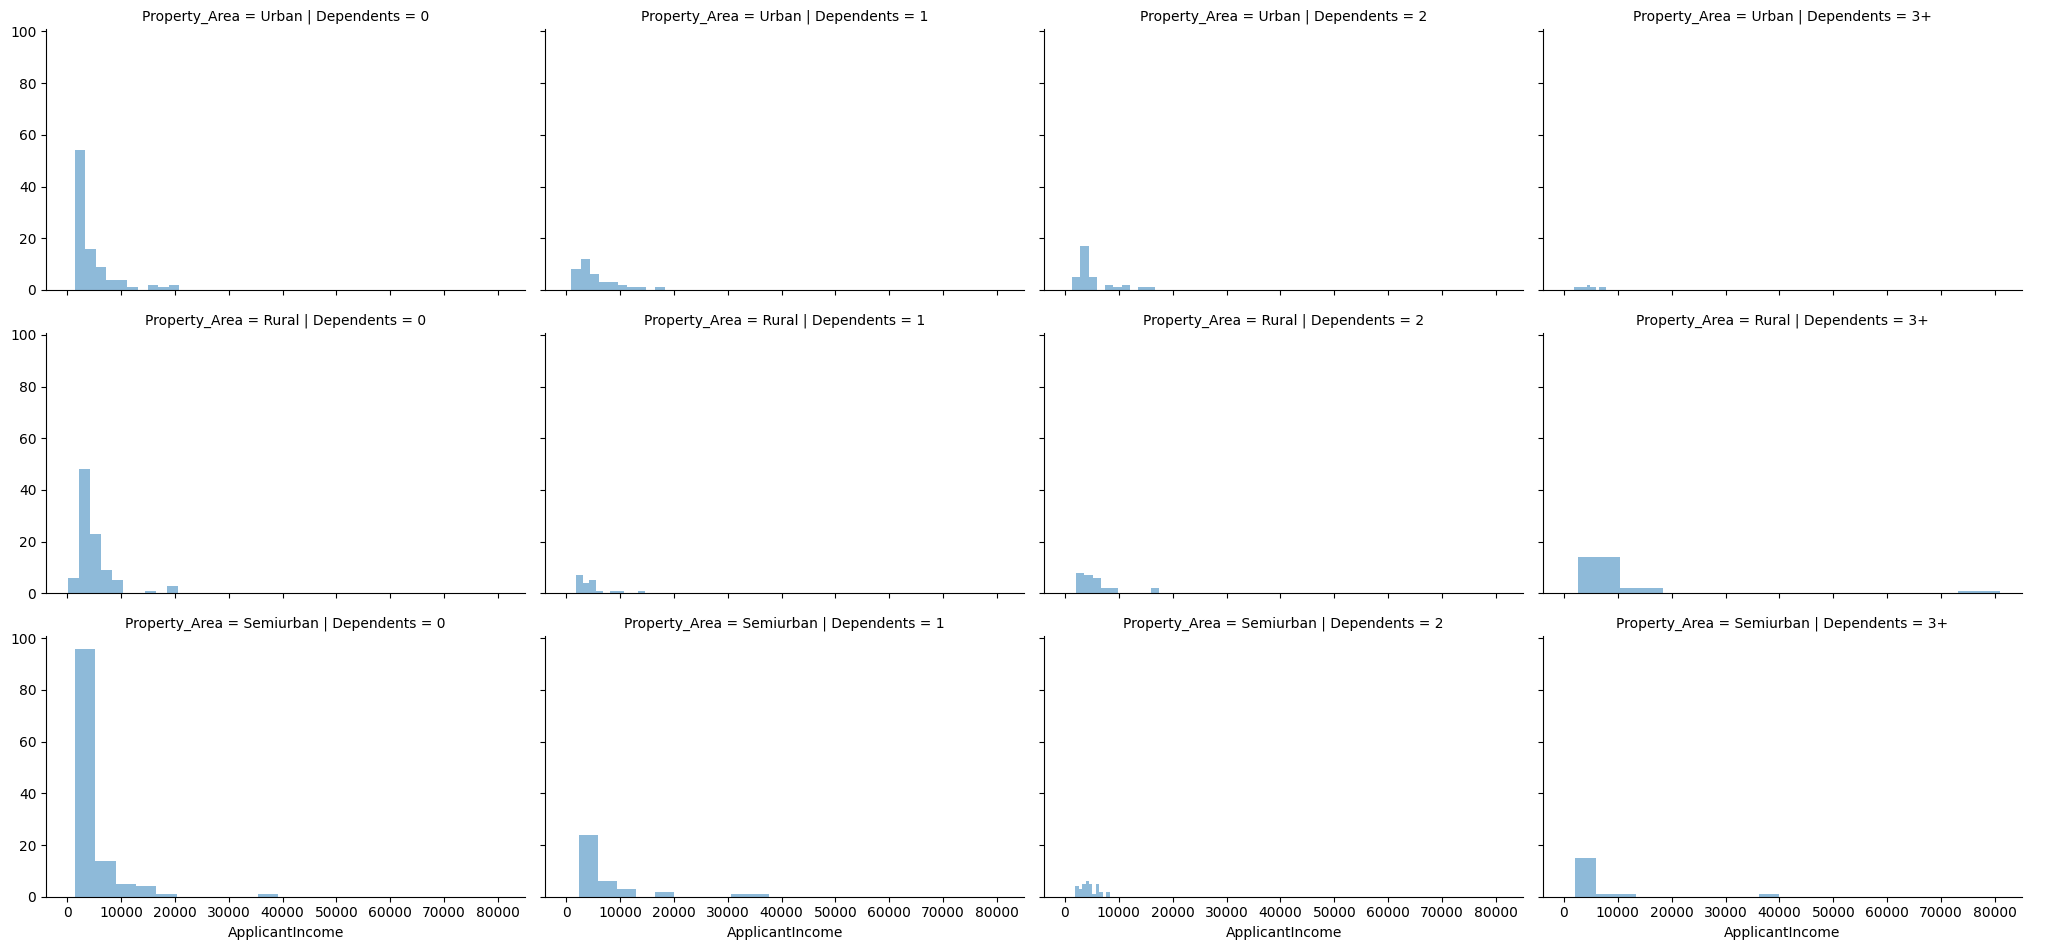

In [28]:
grid = sns.FacetGrid(df_train, row='Property_Area', col='Dependents', height=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

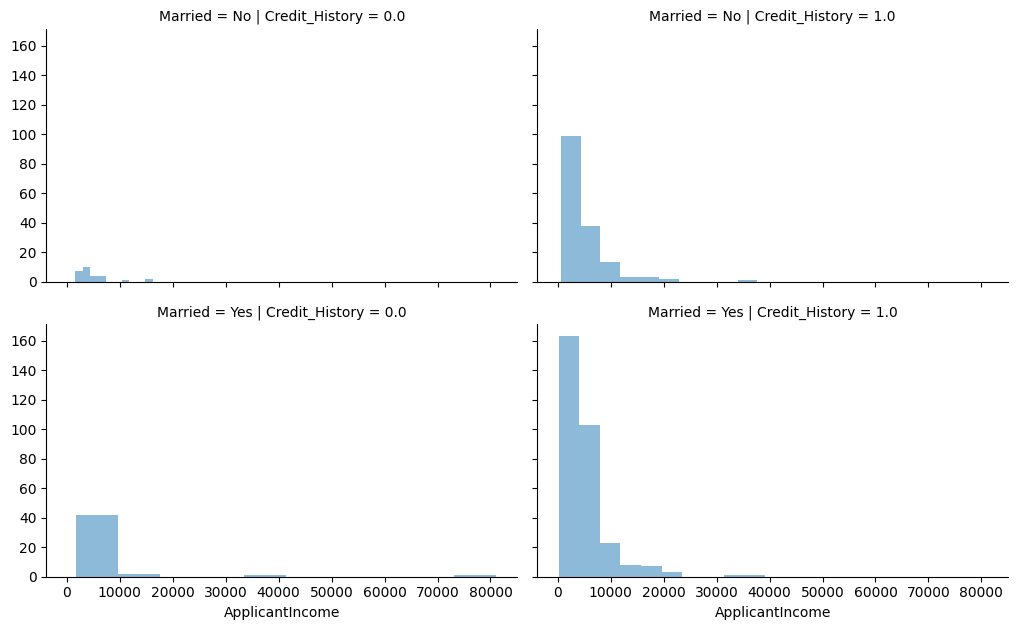

In [29]:
grid = sns.FacetGrid(df_train, row='Married', col='Credit_History', height=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()


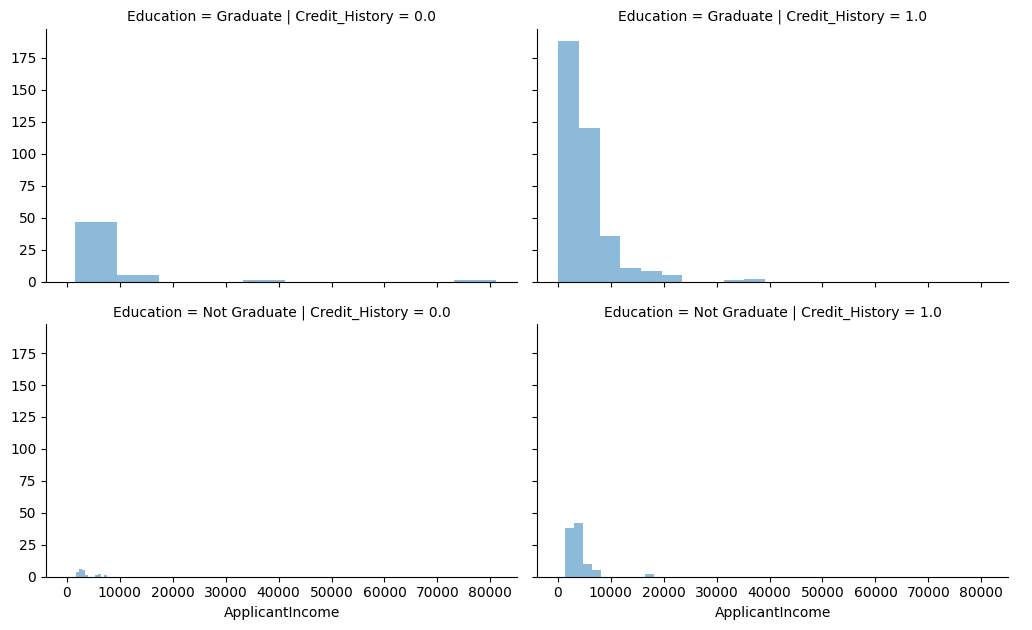

In [30]:
grid = sns.FacetGrid(df_train, row='Education', col='Credit_History', height=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

In [31]:
df_train['Loan_Status'].replace('Y',1,inplace = True)
df_train['Loan_Status'].replace('N',0,inplace = True)

In [32]:
df_train['Loan_Status'].value_counts()

Loan_Status
1    376
0    166
Name: count, dtype: int64

In [33]:
df_train.Gender=df_train.Gender.map({'Male':1,'Female':0})
df_train['Gender'].value_counts()

Gender
1    444
0     98
Name: count, dtype: int64

In [34]:
df_train.Married=df_train.Married.map({'Yes':1,'No':0})
df_train['Married'].value_counts()

Married
1    355
0    187
Name: count, dtype: int64

In [35]:
df_train.Dependents=df_train.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df_train['Dependents'].value_counts()

Dependents
0    309
1     94
2     94
3     45
Name: count, dtype: int64

In [36]:
df_train.Education=df_train.Education.map({'Graduate':1,'Not Graduate':0})
df_train['Education'].value_counts()

Education
1    425
0    117
Name: count, dtype: int64

In [37]:
df_train.Self_Employed=df_train.Self_Employed.map({'Yes':1,'No':0})
df_train['Self_Employed'].value_counts()

Self_Employed
0    467
1     75
Name: count, dtype: int64

In [38]:
df_train.Property_Area=df_train.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df_train['Property_Area'].value_counts()

Property_Area
1    209
2    174
0    159
Name: count, dtype: int64

In [39]:
df_train['LoanAmount'].value_counts()

LoanAmount
146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: count, Length: 195, dtype: int64

In [40]:
df_train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [41]:
df_train['Credit_History'].value_counts()

Credit_History
1.0    468
0.0     74
Name: count, dtype: int64

In [42]:
numeric_df = df_train.select_dtypes(include=[float, int])

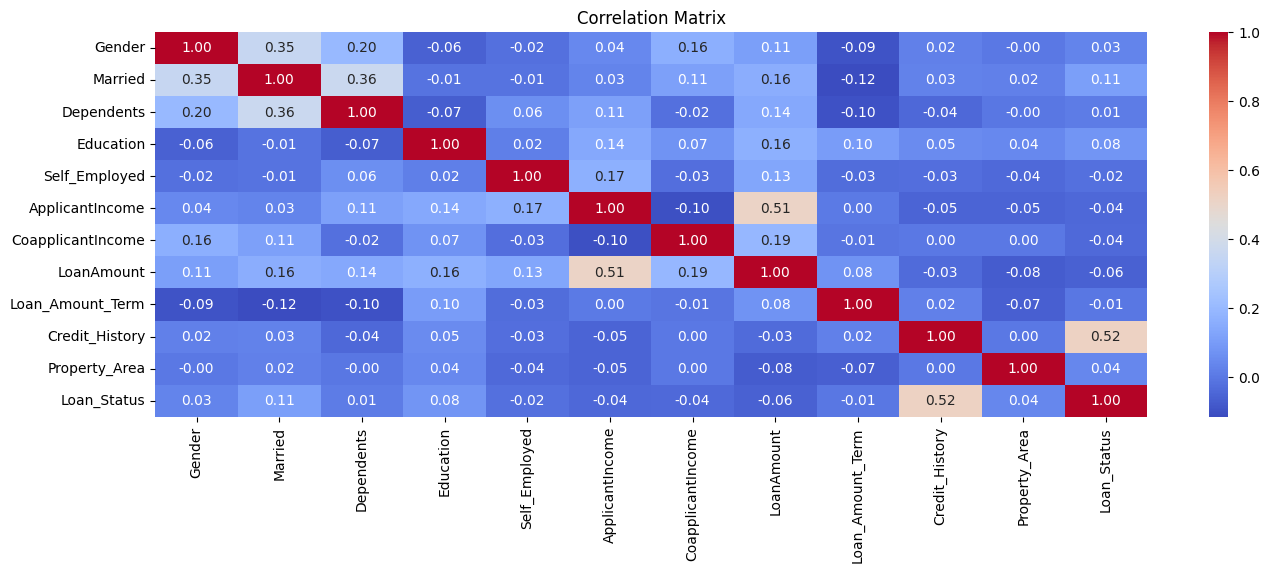

In [43]:
plt.figure(figsize=(16, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [44]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [45]:
X = df_train.iloc[:,1:-1].values
y = df_train.iloc[:,-1].values

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
print(X_train)

[[ 0.4687412   0.72803526  1.20165033 ...  0.27580043  0.41646337
  -1.32153574]
 [ 0.4687412   0.72803526  1.20165033 ...  0.27580043 -2.40117159
   1.21043318]
 [-2.1333734   0.72803526  0.21992468 ...  0.27580043  0.41646337
  -0.05555128]
 ...
 [ 0.4687412   0.72803526  0.21992468 ...  0.27580043  0.41646337
  -0.05555128]
 [ 0.4687412   0.72803526  0.21992468 ... -0.65718072 -2.40117159
  -0.05555128]
 [ 0.4687412   0.72803526 -0.76180097 ...  0.27580043  0.41646337
  -0.05555128]]


# ANN

In [49]:
import keras
ann = keras.models.Sequential()

In [50]:
ann.add(keras.layers.Dense(units=6, activation='relu'))

In [51]:
ann.add(keras.layers.Dense(units=6, activation='relu'))

In [52]:
ann.add(keras.layers.Dense(units=1, activation='sigmoid'))

In [53]:
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
ann.fit(X_train, y_train, batch_size =32, epochs =100)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6720 - loss: 0.6489
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7005 - loss: 0.6469
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6938 - loss: 0.6454
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7087 - loss: 0.6307
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6897 - loss: 0.6364  
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6888 - loss: 0.6298
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7050 - loss: 0.6134
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7296 - loss: 0.6029
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7090 - loss: 0.6027
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6870 - loss: 0.6060
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7124 - loss: 0.6029
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accur

In [55]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10 21]
 [ 1 77]]


0.7981651376146789

In [57]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244 (980.00 B)

In [58]:
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [59]:
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(
    class_weight=None, 
    criterion='gini', 
    max_depth=100,
    max_features=1.0, 
    max_leaf_nodes=10,
    min_samples_leaf=1,
    min_samples_split=2, 
    min_weight_fraction_leaf=0.10,
    random_state=27, 
    splitter='best'
)

Model3.fit(X_train, y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test),"\n")


KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.42      0.65      0.51        20
           1       0.91      0.80      0.85        89

    accuracy                           0.77       109
   macro avg       0.66      0.72      0.68       109
weighted avg       0.82      0.77      0.79       109

Voting Ensemble:> 0.7706422018348624
              precision    recall  f1-score   support

           0       0.32      1.00      0.49        10
           1       1.00      0.79      0.88        99

    accuracy                           0.81       109
   macro avg       0.66      0.89      0.68       109
weighted avg       0.94      0.81      0.85       109

SVM:> 0.8073394495412844
              precision    recall  f1-score   support

           0       0.48      0.52      0.50        29
           1       0.82      0.80      0.81        80

    accuracy                           0.72       109
   macro avg       0.65      0.66      0.66       109
weighted avg

In [60]:
feature_col=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

In [61]:
X = df_train.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status","Property_Area"],axis=1)

y = df_train.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier(random_state=0)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(
    class_weight=None,
    criterion='gini',
    max_depth=100,
    max_features=1.0,
    max_leaf_nodes=10,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.10,
    random_state=27,
    splitter='best'
)
Model3.fit(X_train, y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

542 542
After Standardization
Mean  9.625578932710716e-18 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.49      0.73      0.58        26
           1       0.93      0.82      0.87       110

    accuracy                           0.80       136
   macro avg       0.71      0.77      0.73       136
weighted avg       0.84      0.80      0.82       136

Voting Ensemble:> 0.8014705882352942
              precision    recall  f1-score   support

           0       0.31      1.00      0.47        12
           1       1.00      0.78      0.88       124

    accuracy                           0.80       136
   macro avg       0.65      0.89      0.67       136
weighted avg       0.94      0.80      0.84       136

SVM:> 0.8014705882352942
              precision    recall  f1-score   support

           0       0.62      0.29      0.40        82
           1       0.40      0.72      0.52        54

    accuracy                        

In [62]:
from sklearn.utils import resample
new_data = df_train.copy()

df_majority = new_data[new_data.Loan_Status==1]
df_minority = new_data[new_data.Loan_Status==0]

df_manjority_downsampled = resample(df_majority,replace=False,n_samples=192,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Loan_Status.value_counts())

df_monority_upsampled = resample(df_minority,replace=True,n_samples=422,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.Loan_Status.value_counts())

Downsampled data:->
 Loan_Status
1    192
0    166
Name: count, dtype: int64
Upsampled data:->
 Loan_Status
0    422
1    376
Name: count, dtype: int64


In [63]:
X = df_downsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_downsampled.Loan_Status
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(
    class_weight=None,
    criterion='gini',
    max_depth=100,
    max_features=1.0,
    max_leaf_nodes=10,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.10,
    random_state=27,
    splitter='best'
)

Model3.fit(X_train, y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

After Standardization
Mean  2.8923042161198106e-17 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.72      0.53      0.61        55
           1       0.48      0.69      0.56        35

    accuracy                           0.59        90
   macro avg       0.60      0.61      0.59        90
weighted avg       0.63      0.59      0.59        90

Voting Ensemble:> 0.5888888888888889
              precision    recall  f1-score   support

           0       0.40      1.00      0.57        16
           1       1.00      0.68      0.81        74

    accuracy                           0.73        90
   macro avg       0.70      0.84      0.69        90
weighted avg       0.89      0.73      0.76        90

SVM:> 0.7333333333333333
              precision    recall  f1-score   support

           0       0.88      0.48      0.62        73
           1       0.24      0.71      0.36        17

    accuracy                           0.52

In [64]:
X = df_upsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_upsampled.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)


StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(
    class_weight=None,
    criterion='gini',
    max_depth=100,
    max_features=1.0,
    max_leaf_nodes=10,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.10,
    random_state=27,
    splitter='best'
)

Model3.fit(X_train, y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

798 798
After Standardization
Mean  -3.780631765217924e-18 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.71      0.85      0.78        94
           1       0.84      0.70      0.76       106

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200

Voting Ensemble:> 0.77
              precision    recall  f1-score   support

           0       0.43      1.00      0.60        48
           1       1.00      0.58      0.73       152

    accuracy                           0.68       200
   macro avg       0.71      0.79      0.67       200
weighted avg       0.86      0.68      0.70       200

SVM:> 0.68
              precision    recall  f1-score   support

           0       0.53      0.69      0.60        86
           1       0.69      0.54      0.60       114

    accuracy                           0.60       200
   macro 

In [65]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)

In [66]:
print(predictions)

[0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1
 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1
 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0]


In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       112
           1       0.74      0.82      0.78        88

    accuracy                           0.80       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200



In [68]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
seed = 7
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
num_trees = 150
max_features = 5
model = ExtraTreesClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.9135284810126582


In [69]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(init='k-means++',n_clusters=2,n_init=10)
y_kmeans2 = kmeans2.fit_predict(X_test)
print(y_kmeans2)

kmeans2.cluster_centers_

[0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1]


array([[ 0.46253524,  0.71587999,  0.37691806, -0.07844907, -0.11935519,
        -0.01903548,  0.18906648,  0.09606205, -0.13132836,  0.00997826,
         0.14060451],
       [-0.6520075 , -1.00913203, -0.53131822,  0.11058483,  0.16824767,
         0.02683315, -0.2665154 , -0.13541276,  0.18512552, -0.01406574,
        -0.19820154]])

In [70]:
print(classification_report(y_test, y_kmeans2))

              precision    recall  f1-score   support

           0       0.49      0.51      0.50       112
           1       0.34      0.32      0.33        88

    accuracy                           0.42       200
   macro avg       0.41      0.41      0.41       200
weighted avg       0.42      0.42      0.42       200



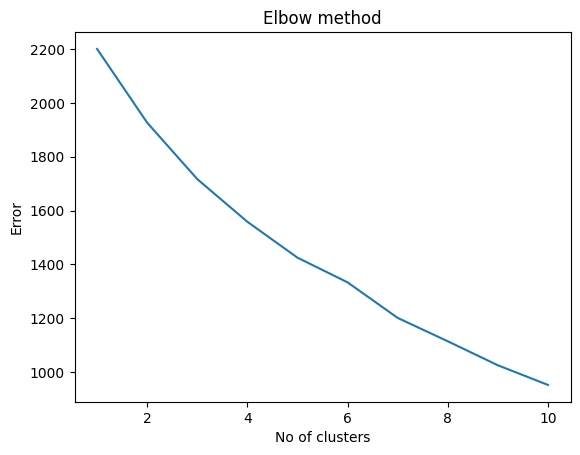

In [71]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X_test)
    kmeans.fit(X_test)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [72]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 70
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7557594936708861


In [73]:
from sklearn.ensemble import BaggingClassifier
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.8947310126582277


In [74]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.7719145569620254


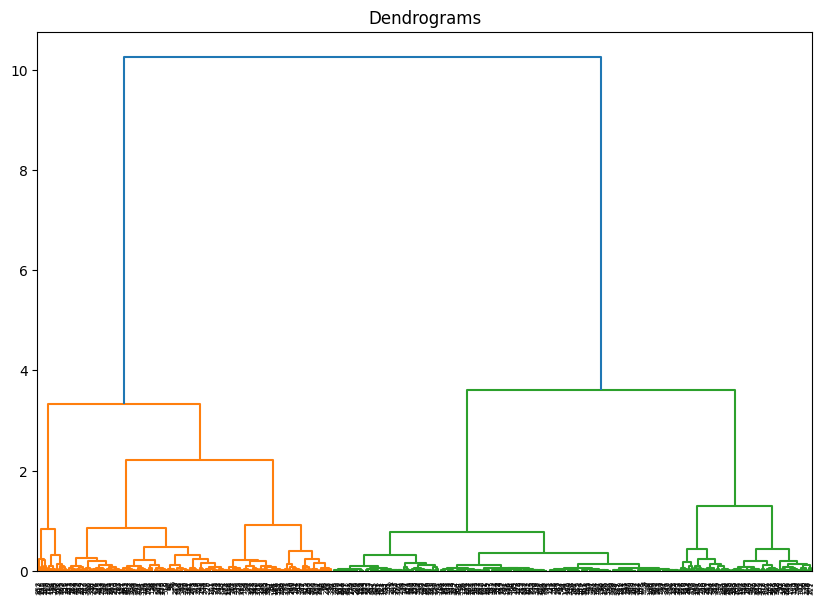

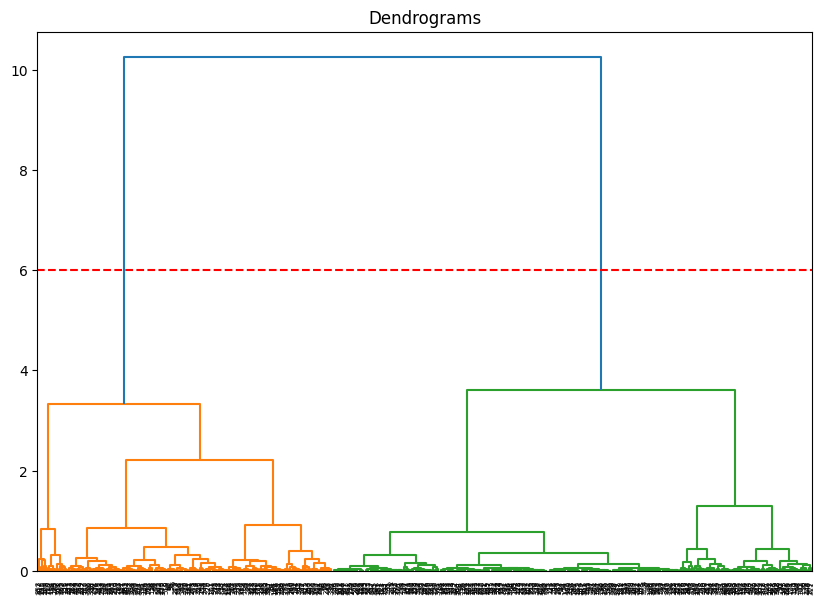

In [75]:
from sklearn.preprocessing import normalize
df_train = df_train.drop('Loan_ID', axis = 1) 
data_scaled = normalize(df_train)
data_scaled = pd.DataFrame(data_scaled, columns=df_train.columns)
data_scaled.head()
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [76]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
hcloanpred=cluster.fit_predict(data_scaled)
print(hcloanpred)

[0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0
 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0
 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1
 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1
 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 1 0 1 0 1 1 1 1 0 1 

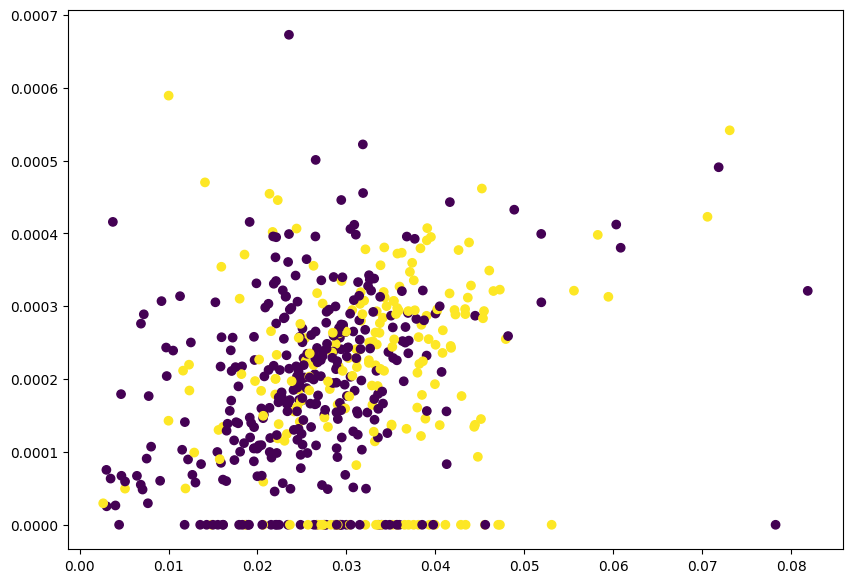

In [77]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['LoanAmount'], data_scaled['Credit_History'], c=cluster.labels_) 

In [78]:
accu = {'ANN':81, 'MLP':80, 'LR':80,'K-NN':80,'SVM':81,'DecisionTree':81,'RandomForest':78,'AdaBoost':78,'GradientBoosting':78,'LinearDiscriminant':81,'NaiveBayes':81,'ExtraTree':89,'KMeans':69,'EadaBoost':76,'EDecisionTree':88,'ELogistic':79}
key = list(accu.keys())
values = list(accu.values())

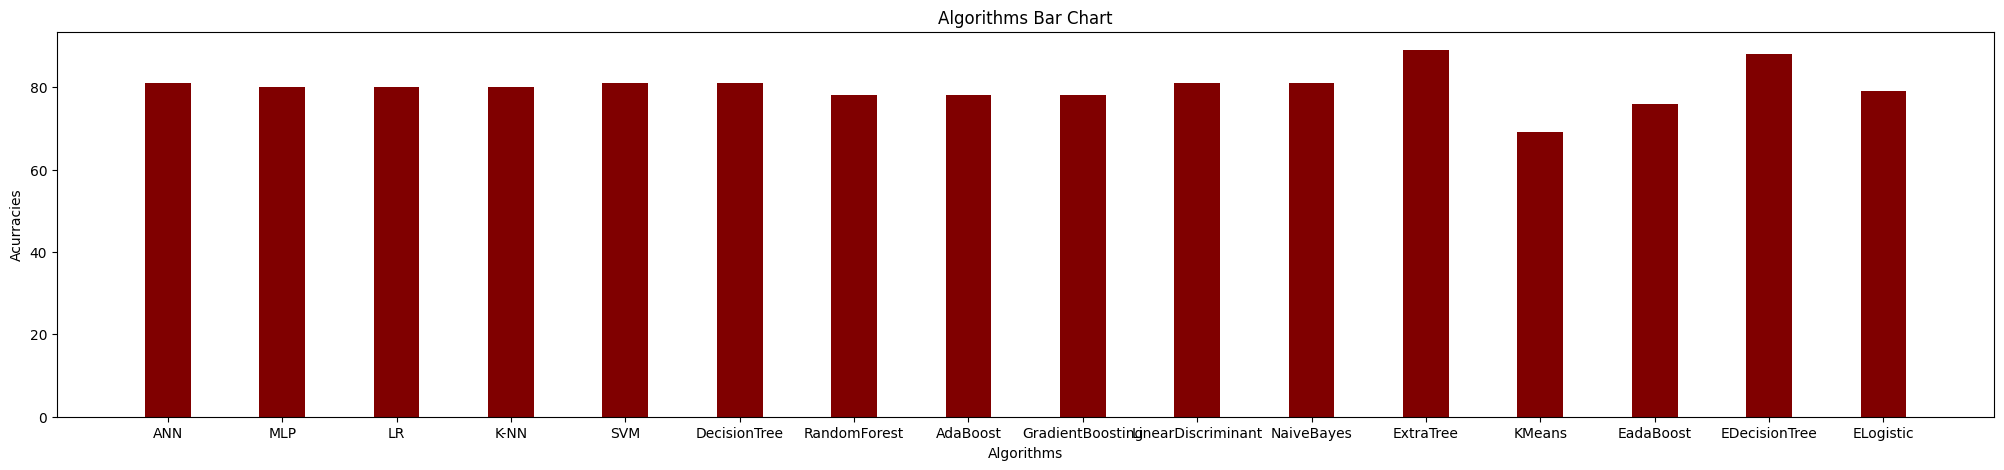

In [79]:
fig = plt.figure(figsize = (25, 5))
plt.bar(key, values, color ='maroon', width = 0.4) 
  
plt.xlabel("Algorithms") 
plt.ylabel("Acurracies") 
plt.title("Algorithms Bar Chart") 
plt.show() 

In [80]:
ac = {'LR':80,'K-NN':80,'SVM':80,'DecisionTree':80,'XGBoost':69,'RandomForest':79,'AdaBoost':79,'GradientBoosting':80,'LinearDiscriminant':80,'NaiveBayes':79,'Voting Ensemble':82}
key1 = list(ac.keys())
values1 = list(ac.values())

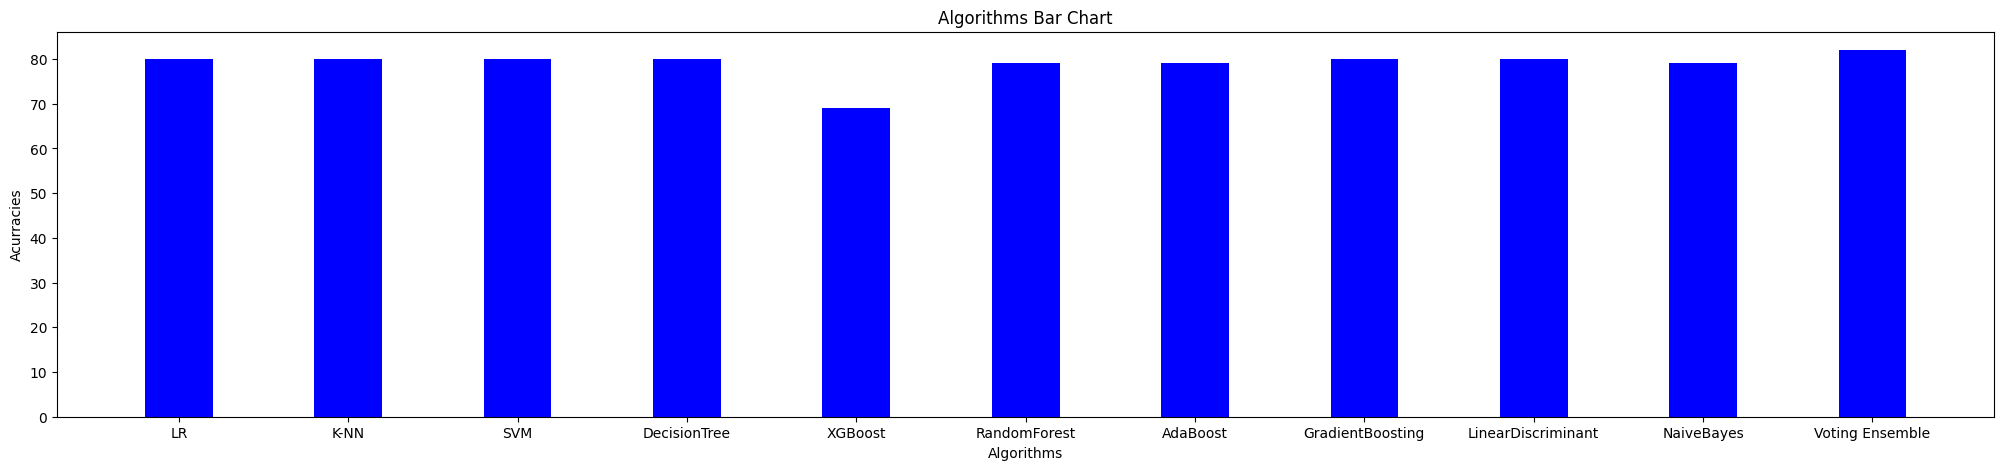

In [81]:
fig = plt.figure(figsize = (25, 5))
plt.bar(key1, values1, color ='Blue',  
        width = 0.4) 
  
plt.xlabel("Algorithms") 
plt.ylabel("Acurracies") 
plt.title("Algorithms Bar Chart") 
plt.savefig('Selected Algorithms.png',dpi=1000)
plt.show() 

In [82]:
ac1 = {'LR':70,'K-NN':68,'SVM':73,'DecisionTree':68,'XGBoost':62,'RandomForest':65,'AdaBoost':58,'GradientBoosting':62,'LinearDiscriminant':70,'NaiveBayes':68,'Voting Ensemble':61}
key2 = list(ac1.keys())
values2 = list(ac1.values())

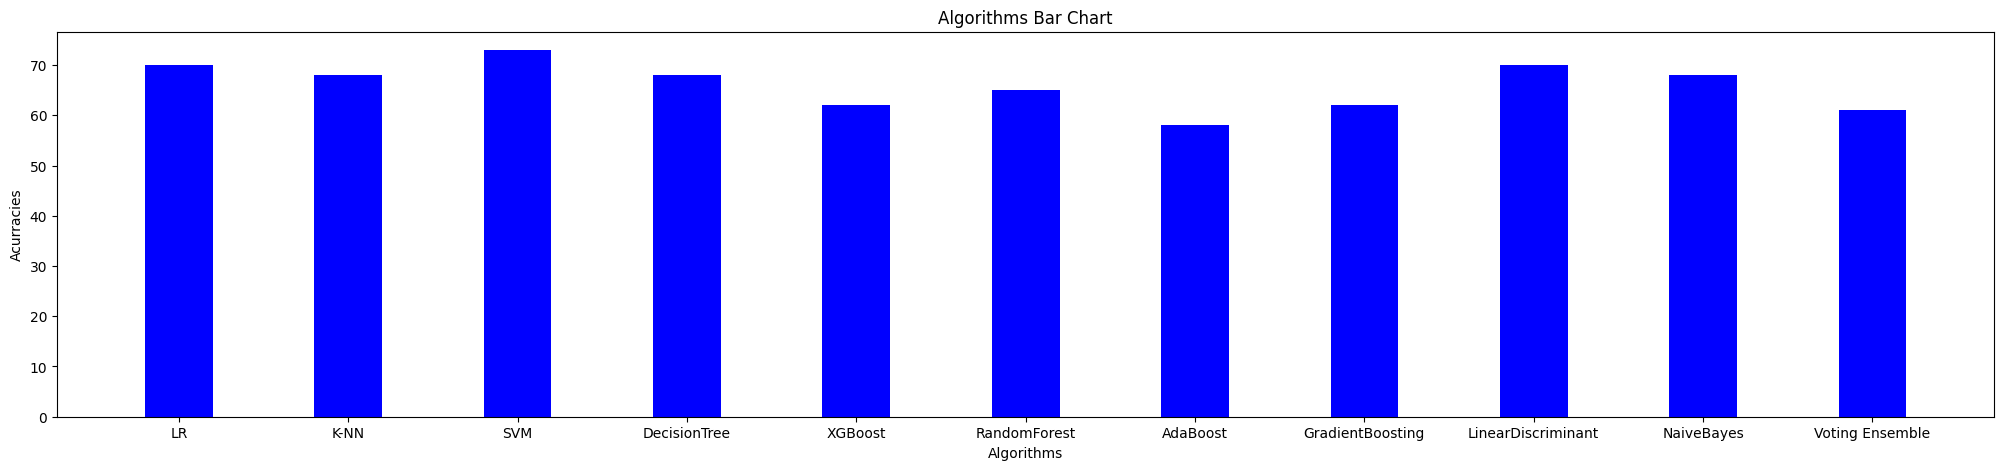

In [83]:
fig = plt.figure(figsize = (25, 5))
plt.bar(key2, values2, color ='Blue',width = 0.4) 
  
plt.xlabel("Algorithms") 
plt.ylabel("Acurracies") 
plt.title("Algorithms Bar Chart") 
plt.show() 

In [84]:
ac2 = {'LR':66,'K-NN':71,'SVM':68,'DecisionTree':66,'XGBoost':65,'RandomForest':84,'AdaBoost':66,'GradientBoosting':70,'LinearDiscriminant':67,'NaiveBayes':69,'Voting Ensemble':74}
key3 = list(ac2.keys())
values3 = list(ac2.values())

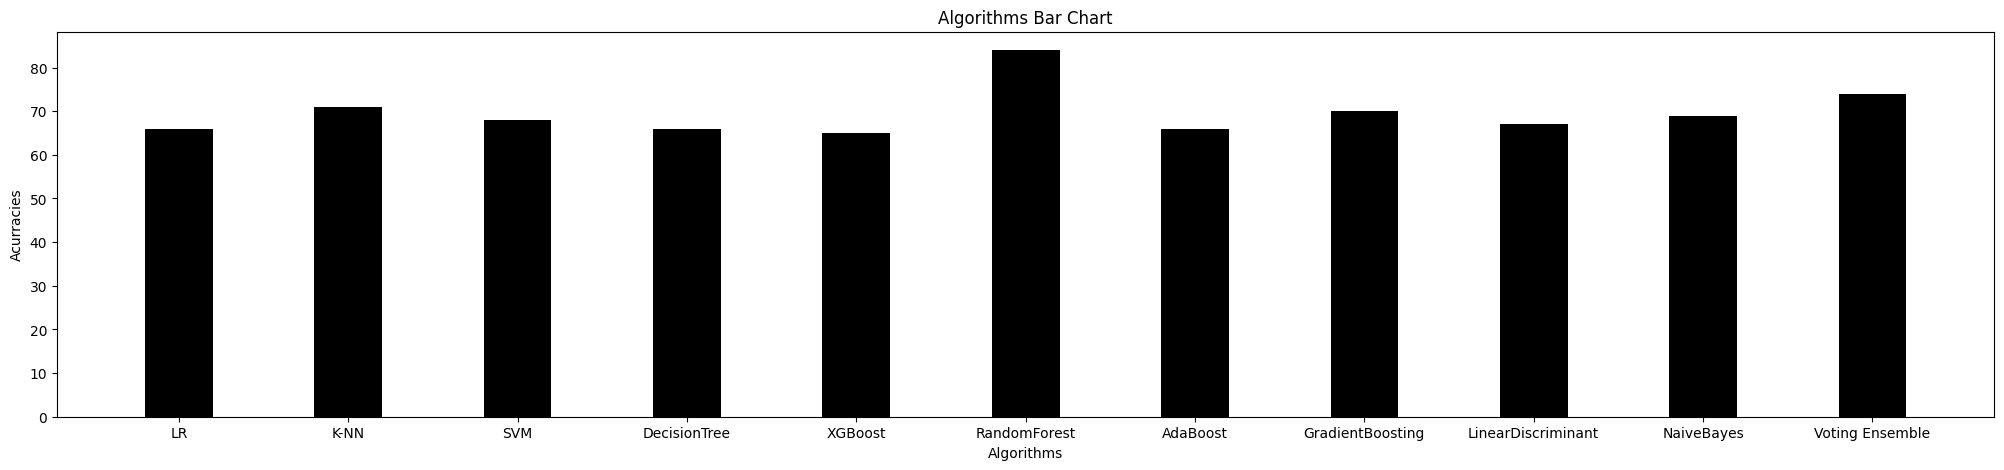

In [85]:
fig = plt.figure(figsize = (25, 5))
plt.bar(key3, values3, color ='Black',  width = 0.4) 
  
plt.xlabel("Algorithms") 
plt.ylabel("Acurracies") 
plt.title("Algorithms Bar Chart") 
plt.show() 

In [86]:
barWidth = 0.25
bars1 = [75, 65, 26, 79, 77, 70]
bars2 = [81, 81, 60, 81, 88, 81]

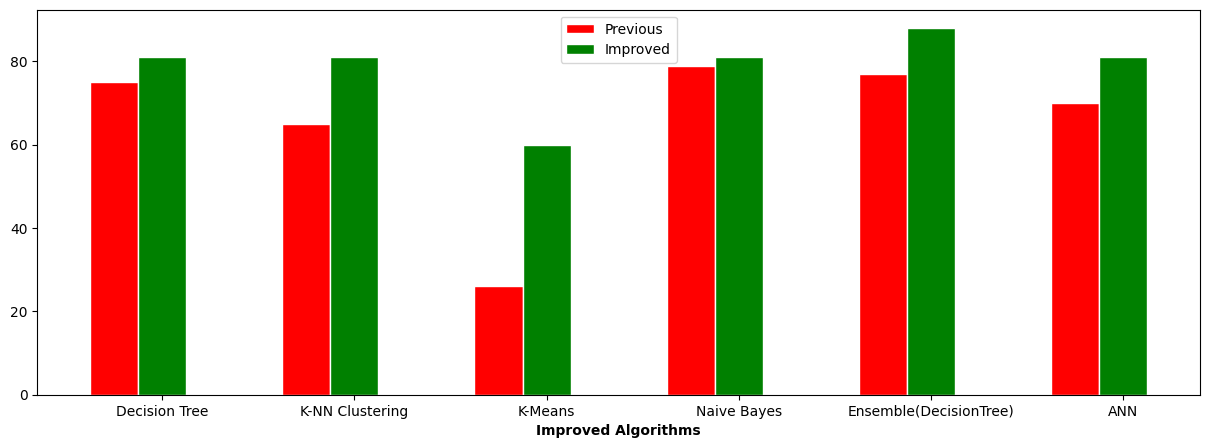

In [87]:
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
fig = plt.figure(figsize = (15, 5))
plt.bar(r1, bars1, color='Red', width=barWidth, edgecolor='white', label='Previous')
plt.bar(r2, bars2, color='Green', width=barWidth, edgecolor='white', label='Improved')

plt.xlabel('Improved Algorithms', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Decision Tree', 'K-NN Clustering', 'K-Means', 'Naive Bayes', 'Ensemble(DecisionTree)','ANN'])
 
plt.legend()
plt.show()

In [88]:
accuracies = {'ANN':81,'MLP':80,'ExtraTree':89,'KMeans':60,'EAdaboost':71,'EDecision':88,'ELogistic':55,'LR(All)':81,'K-NN(All)':81,'SVM(All)':81,'GradientBoosting(Selected)':80,'DecisionTree(All)':81,'XGBoost(Selected)':69,'RandomForest(Up Sampled)':84,'AdaBoost(Selected)':79,'LinearDiscriminant(All)':81,'NaiveBayes(All)':81,'Voting Ensemble(Selected)':82}
key4 = list(accuracies.keys())
values4 = list(accuracies.values())

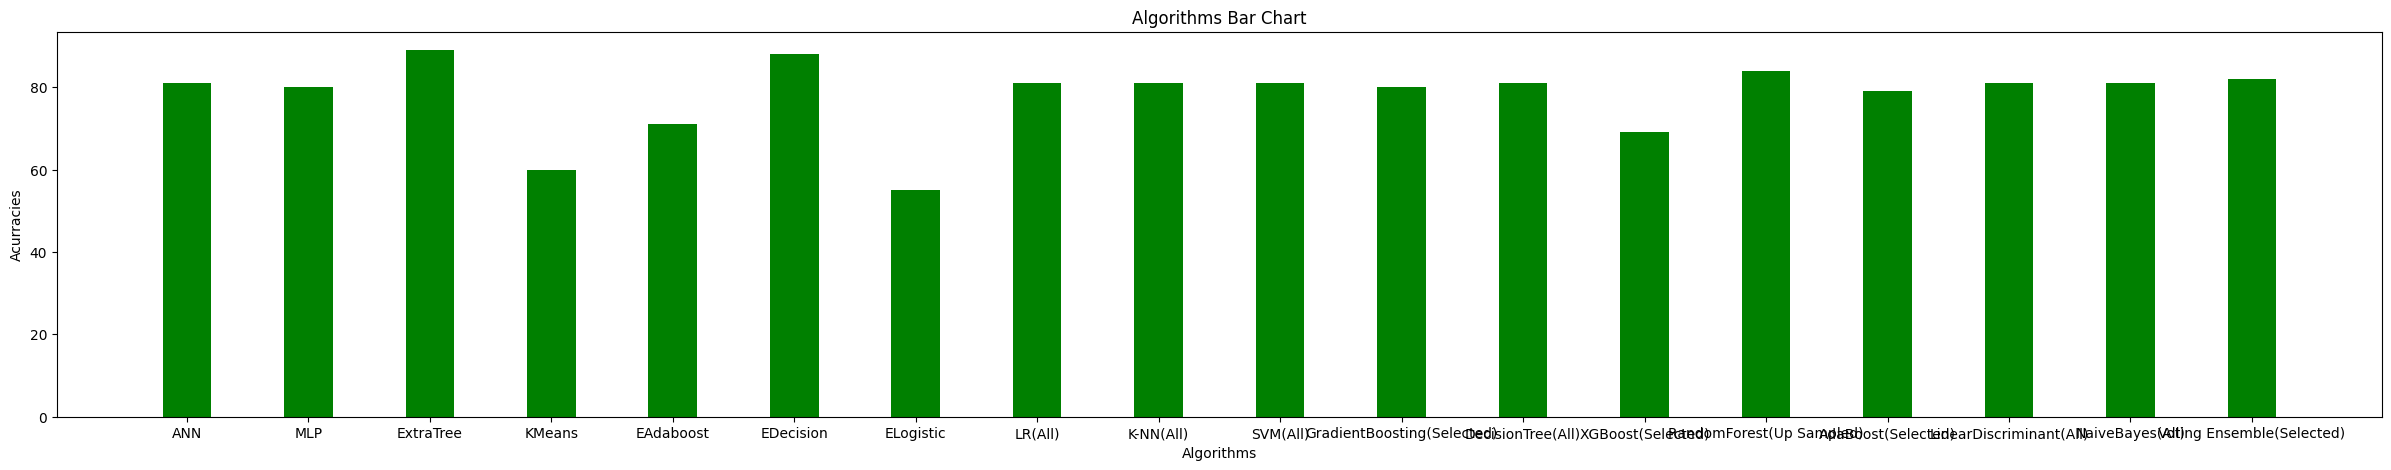

In [89]:
fig = plt.figure(figsize = (30, 5))
plt.bar(key4, values4, color ='Green',  width = 0.4) 
  
plt.xlabel("Algorithms") 
plt.ylabel("Acurracies") 
plt.title("Algorithms Bar Chart") 
plt.show() 